In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 11.1

Determine by operating counting the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$. (This is a reasoning exercise - you do not need to write a program.)


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

1. Dot product between two vectors of length $n$: we have to iterate through all elements of the vectors, so the complexity is $O(n)$
2. Matrix-vector product between a vector of length $n$ and a $n \times n$ matrix: to obtain an element of the product we have to multiply each row of the matrix with the vector, which is like doing $n$ times a dot product; therefore the complexity is $O(n^2)$
3. Matrix-matrix product between $n \times n$ matrices: the $(i,j)$-th element of the product is the dot product between the $i$-th row of the first matrix and the $j$-th column of the second one; since we have $n^2$ elements in the product the complexity is $O(n^3)$

Functions for calculating dot product and matrix-vector/matrix-matrix product for experimentally determine the complexity:

In [43]:
def dot_product(A, B):
    "Compute the dot product between two vectors of equal length,"
    # Check if A and B are vectors 
    if len(np.shape(A)) == 1 and len(np.shape(B)) == 1:
        # Check if A and B have the same length
        if len(A) == len(B):
            # Initialize product
            P = 0
            # Calculate dot product iterating over each element
            for i in range(len(A)):
                P += A[i]*B[i]
        else:
            raise ValueError('Vectors must be of the same length')
    else:
        raise ValueError('A and B must be vectors')
    
    return P

def product(A, B):
    """Compute the product between two numpy arrays:
        A and B can be a matrix of size (m,n) and a vector of length n
        or two matrices of size, respectively, (m,l) and (l,n)"""
    # Matrix-vector case
    if len(np.shape(A)) == 2 and len(np.shape(B)) == 1:
        # Check if the number of columns of A is equal to the number of elements of B
        if np.shape(A)[1] == len(B):
            # Initialize the product
            P = np.zeros(len(B))
            #Calculate product iterating over the rows of A and using dot_product function
            for i in range(np.shape(A)[0]):
                P[i] = dot_product(A[i], B)
        else:
            raise ValueError('The number of columns of A must equal the length of B')
    
    # Matrix-matrix case
    elif len(np.shape(A)) == 2 and len(np.shape(B)) == 2:
        # Check if the number of columns of A is equal to the number of rows of B
        if np.shape(A)[1] == np.shape(B)[0]:
            # Initialize the product
            P = np.zeros((np.shape(A)[0], np.shape(B)[1]))
            # Calculate product iterating over the rows of A and columns of B and using dot_product function
            for i in range(np.shape(A)[0]):
                for j in range(np.shape(B)[1]):
                    P[i, j] = dot_product(A[i], B[j])
        else:
            raise ValueError('The number of columns of A must equal the number of rows of B')
    else:
        raise ValueError('A and B must be a matrix and a vector or two matrices')
    
    return P

# Test cases
A = np.array([0, 1])
B = np.array([1, 0])
M = np.array([[1, 1], [1, 1]])
N = np.array([[1, 1], [1, 1]])

print(dot_product(A, A))
print(dot_product(A, B))
print(product(M, B))
print(product(M, N))

1
0
[ 1.  1.]
[[ 2.  2.]
 [ 2.  2.]]
[[2 2]
 [2 2]]


Test for matrix-matrix product using 8 different matrix dimensions:

In [44]:
# Test dimensions
N = (2, 4, 8, 16, 32, 64, 128, 256)

# Initialize times vectors
times = []
numpy_times = []

# Time executions for each dimension
for n in N:
    # Generate random matrices for testing
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    # My function
    t1 = %timeit -q -n4 -r1 -o product(A, B)
    times.append(t1.best)
    # Numpy function
    t2 = %timeit -q -n4 -r1 -o A.dot(B)
    numpy_times.append(t2.best)

Plot of my functions vs. numpy ones:

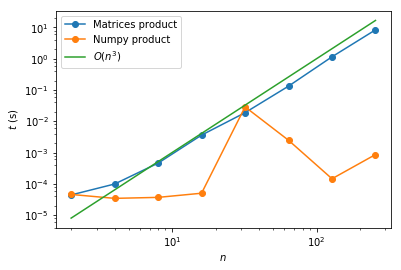

In [45]:
# Plot and label the time taken
plt.loglog(N, times, marker='o', label='Matrices product')
plt.loglog(N, numpy_times, marker='o', label='Numpy product')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# Show a reference line of O(n^3)
plt.loglog(N, 1e-6*np.array(N)**3, label='$O(n^3)$')

# Add legend
plt.legend(loc=0);

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

The recursive implementation calls the function n times, in each call it computes a product so the complexity should be $O(n)$

In [46]:
def fact(n):
    "Calculate factorial recursively"
    if n == 0:
        return 1
    else:
        return n*fact(n-1)

# Test cases
print('Calculated factorial:',fact(5))

Calculated factorial: 120


Let's test this using some numerical examples:

In [52]:
# Test cases
N = (2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2056)

# Initialize times vectors
times = []

# Increase the limit on recursion
import sys
sys.setrecursionlimit(25000)

# Time executions for each n
for n in N:
    t1 = %timeit -q -n4 -r1 -o fact(n)
    times.append(t1.best)

Plot the results:

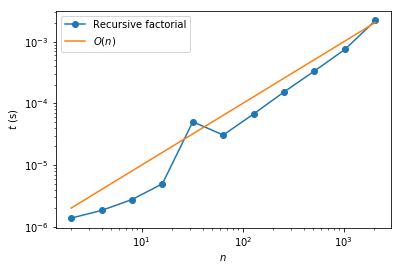

In [53]:
# Plot and label the time taken
plt.loglog(N, times, marker='o', label='Recursive factorial')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# Show a reference line of O(n)
plt.loglog(N, 1e-6*np.array(N), label='$O(n)$')

# Add legend
plt.legend(loc=0);

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [ ]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [ ]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime. Use a log-log scale for
your plot.

In [85]:
# Test dimensions
N = 2**np.arange(2, 13)

# Initialize times vectors
times = []

# Time executions for each dimension
for n in N:
    A = np.random.rand(n, n)
    t1 = %timeit -q -n4 -r1 -o np.linalg.slogdet(A)
    times.append(t1.best)
    
print(N)
print(times)

[   4    8   16   32   64  128  256  512 1024 2048 4096]
[5.7822388725981e-05, 4.783405211128411e-05, 4.4443515662351274e-05, 8.787903448137513e-05, 0.00015138286244109622, 0.0002687687258458027, 0.0012092301758457324, 0.00483023126776061, 0.047464483674502844, 0.2321542331121691, 1.8285039267909724]


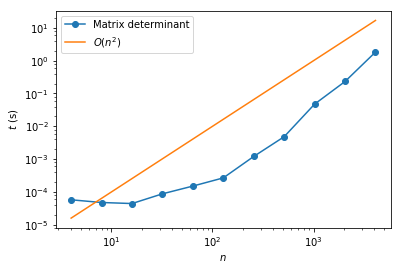

In [87]:
# Plot and label the time taken
plt.loglog(N, times, marker='o', label='Matrix determinant')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# Show a reference line of O(n^2)
plt.loglog(N, 1e-6*np.array(N)**2, label='$O(n^2)$')

# Add legend
plt.legend(loc=0);

$O(n^2)$ seems a good fit, to see it better let's try again with powers of 10:

In [95]:
# Test dimensions
N = 10**np.arange(1, 5)

# Initialize times vectors
times = []

# Time executions for each dimension
for n in N:
    A = np.random.rand(n, n)
    t1 = %timeit -q -n4 -r1 -o np.linalg.slogdet(A)
    times.append(t1.best)

print(N)
print(times)

[   10   100  1000 10000]
[3.10646430534689e-05, 0.000305056627439626, 0.03741942436386125, 21.547240250100685]


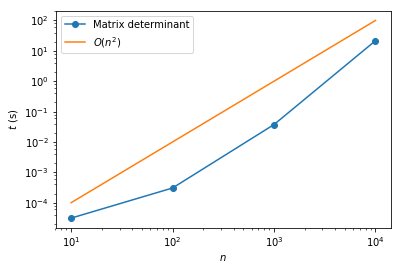

In [96]:
# Plot and label the time taken
plt.loglog(N, times, marker='o', label='Matrix determinant')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# Show a reference line of O(n^2)
plt.loglog(N, 1e-6*np.array(N)**2, label='$O(n^2)$')

# Add legend
plt.legend(loc=0);

Yep, seems good!